# Make a prediction about production

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor 
#input = true & predicted
from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error 

sns.set();

C:\Users\Ja9\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv("../data/cleaned_coal_data.csv", index_col='MSHA ID')
df.head()

,Year,Mine_Name,Mine_State,Mine_County,Mine_Status,Mine_Type,Company_Type,Operation_Type,Operating_Company,Operating_Company_Address,Union_Code,Coal_Supply_Region,Production_(short_tons),Average_Employees,Labor_Hours,log_production
MSHA ID,,,,,,,,,,,,,,,,
103381,2013,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Independent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,56004,10,22392,10.933178
103404,2013,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Independent Producer Operator,Mine only,"Taft Coal Sales & Associates,","3000 Riverchase Galleria Ste 1, Birmingham, AL...",UNIT,Appalachia Southern,28807,18,28447,10.268374
100759,2013,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Independent Producer Operator,Mine and Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",UNIT,Appalachia Southern,1440115,183,474784,14.180234
103246,2013,Bear Creek,Alabama,Franklin,Active,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",,Appalachia Southern,87587,13,29193,11.380388
103451,2013,Knight Mine,Alabama,Franklin,Active,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",,Appalachia Southern,147499,27,46393,11.901577


In [3]:
len(df)

1061

In [4]:
for column in df.columns:
    print(column)

Year
Mine_Name
Mine_State
Mine_County
Mine_Status
Mine_Type
Company_Type
Operation_Type
Operating_Company
Operating_Company_Address
Union_Code
Coal_Supply_Region
Production_(short_tons)
Average_Employees
Labor_Hours
log_production


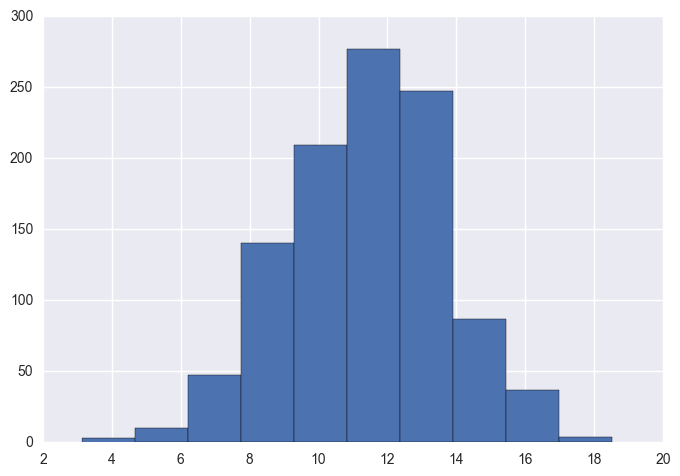

In [5]:
df.log_production.hist()

In [6]:
df.Mine_Status.unique()

array(['Active, men working, not producing', 'Permanently abandoned',
       'Active', 'Temporarily closed', 'New, under construction'], dtype=object)

In [7]:
df[['Mine_Status','Production_(short_tons)']].groupby('Mine_Status').mean()

,Production_(short_tons)
Mine_Status,
Active,1.283471e+06
"Active, men working, not producing",1.259756e+05
"New, under construction",5.200000e+01
Permanently abandoned,6.050497e+04
Temporarily closed,2.966640e+04


In [8]:
df[['Mine_Status','log_production']].groupby('Mine_Status').mean()

,log_production
Mine_Status,
Active,11.977453
"Active, men working, not producing",10.499962
"New, under construction",3.951244
Permanently abandoned,9.896046
Temporarily closed,9.162933


# Predict production of mines

In [9]:
for column in df.columns:
    print(column)

Year
Mine_Name
Mine_State
Mine_County
Mine_Status
Mine_Type
Company_Type
Operation_Type
Operating_Company
Operating_Company_Address
Union_Code
Coal_Supply_Region
Production_(short_tons)
Average_Employees
Labor_Hours
log_production


In [10]:
df.Union_Code.unique()

array([' ', 'UNIT', 'United Mine Workers of America', 'INTE',
       'International Union of Operation Engineers',
       'Scotia Employees Association', 'Western Energy Workers'], dtype=object)

In [11]:
df.Year.unique()

array([2013], dtype=int64)

In [12]:
#indent: highlight + Ctrl + ] 
#numerical
features = ['Average_Employees',
            'Labor_Hours',
           ]
#non-numerical
#have to turn into numbers with dummy vars
categoricals = ['Mine_State',
            'Mine_County',
            'Mine_Status',
            'Mine_Type',
            'Company_Type',
            'Operation_Type',
            'Operating_Company',
            'Union_Code',
            'Coal_Supply_Region',
           ]

target = 'log_production'

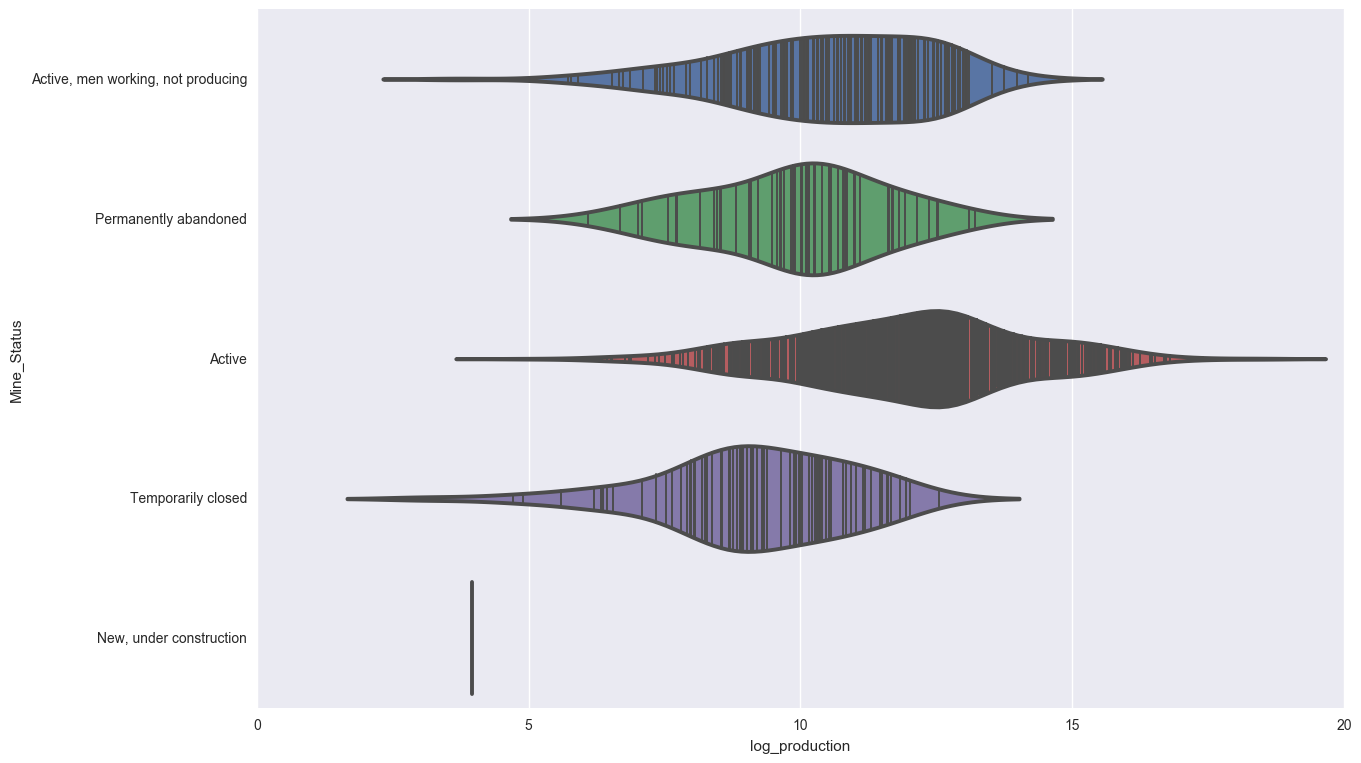

In [13]:
fig = plt.subplots(figsize=(14,8))
sns.set_context('poster')
sns.violinplot(y="Mine_Status",x="log_production",
              data=df,split=True,inner="stick")
plt.tight_layout()

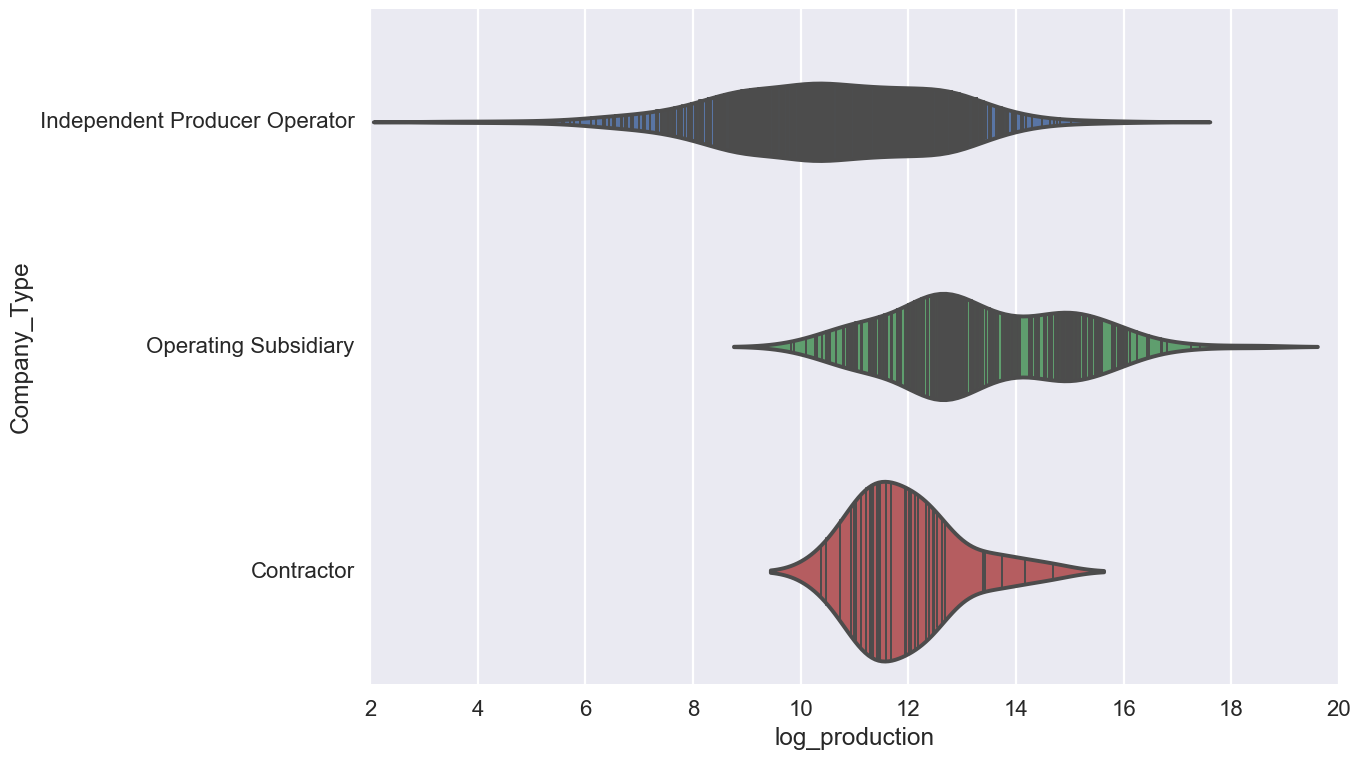

In [14]:
fig = plt.subplots(figsize=(14,8))
sns.set_context('poster')
sns.violinplot(y="Company_Type",x="log_production",
              data=df,split=True,inner="stick")
plt.tight_layout()

In [15]:
df['Company_Type'].unique()

array(['Independent Producer Operator', 'Operating Subsidiary',
       'Contractor'], dtype=object)

In [16]:
pd.get_dummies(df['Company_Type']).sample(50).head()

,Contractor,Independent Producer Operator,Operating Subsidiary
MSHA ID,,,
3200491,0,0,1
4609362,0,1,0
3609214,0,1,0
4200079,0,1,0
103172,0,1,0


In [17]:
pd.get_dummies(df[categoricals]).head()

,Mine_State_Alabama,Mine_State_Alaska,Mine_State_Arizona,Mine_State_Arkansas,Mine_State_Colorado,Mine_State_Illinois,Mine_State_Indiana,Mine_State_Kansas,Mine_State_Kentucky (East),Mine_State_Kentucky (West),...,Union_Code_United Mine Workers of America,Union_Code_Western Energy Workers,Coal_Supply_Region_Appalachia Central,Coal_Supply_Region_Appalachia Northern,Coal_Supply_Region_Appalachia Southern,Coal_Supply_Region_Illinois Basin,Coal_Supply_Region_Interior,Coal_Supply_Region_Powder River Basin,Coal_Supply_Region_Uinta Region,Coal_Supply_Region_Western
MSHA ID,,,,,,,,,,,,,,,,,,,,,
103381,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
103404,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
100759,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
103246,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
103451,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [18]:
#turn vars into dummies
dummy_categoricals = []
for categorical in categoricals:
    print(categorical,len(df[categorical].unique()))
    #avoid trap of dummies
    drop_var = sorted(df[categorical].unique())[-1]
    temp_df = pd.get_dummies(df[categorical],prefix=categorical)
    df = pd.concat([df, temp_df], axis=1)
    temp_df.drop('_'.join([categorical, str(drop_var)]),axis=1,inplace=True)
    dummy_categoricals += temp_df.columns.tolist()

Mine_State 29
Mine_County 164
Mine_Status 5
Mine_Type 3
Company_Type 3
Operation_Type 2
Operating_Company 752
Union_Code 7
Coal_Supply_Region 8


In [19]:
#look at first 10
dummy_categoricals[:10]

['Mine_State_Alabama',
 'Mine_State_Alaska',
 'Mine_State_Arizona',
 'Mine_State_Arkansas',
 'Mine_State_Colorado',
 'Mine_State_Illinois',
 'Mine_State_Indiana',
 'Mine_State_Kansas',
 'Mine_State_Kentucky (East)',
 'Mine_State_Kentucky (West)']

# Build a model

In [20]:
#import from sklearn train_test_split & RandomForestRegressor

In [21]:
len(dummy_categoricals)

964

In [22]:
train, test = train_test_split(df, test_size=0.3)
train.head()

,Year,Mine_Name,Mine_State,Mine_County,Mine_Status,Mine_Type,Company_Type,Operation_Type,Operating_Company,Operating_Company_Address,...,Union_Code_United Mine Workers of America,Union_Code_Western Energy Workers,Coal_Supply_Region_Appalachia Central,Coal_Supply_Region_Appalachia Northern,Coal_Supply_Region_Appalachia Southern,Coal_Supply_Region_Illinois Basin,Coal_Supply_Region_Interior,Coal_Supply_Region_Powder River Basin,Coal_Supply_Region_Uinta Region,Coal_Supply_Region_Western
MSHA ID,,,,,,,,,,,,,,,,,,,,,
103370,2013,Cresent Valley Mine,Alabama,Walker,Temporarily closed,Surface,Independent Producer Operator,Mine only,"Reed Minerals, Inc","P.O. Box 2420, Jasper, AL 35502",...,0,0,0,0,1,0,0,0,0,0
1519701,2013,Wynn / Diamond Mine,Kentucky (West),Webster,Active,Surface,Independent Producer Operator,Mine only,"Highwall Mining, Llc","P.O. Box 2303, Pikeville, KY 41501",...,0,0,0,0,0,1,0,0,0,0
1202325,2013,Hurricane Creek,Indiana,Gibson,Active,Surface,Operating Subsidiary,Mine only,Triad Mining Inc,"14521 E St Rd 58, Edwardsport, IN 47528",...,0,0,0,0,0,1,0,0,0,0
4609426,2013,Garland Surface Mine,West Virginia (Southern),Mcdowell,Active,Surface,Independent Producer Operator,Mine only,"Stollings Trucking Co., Inc.","P.O. Box 328, Mount Gay, WV 25637",...,0,0,1,0,0,0,0,0,0,0
1800769,2013,Carlos Surface,Maryland,Allegany,Temporarily closed,Surface,Independent Producer Operator,Mine only,Vindex Energy Corporation,"265 Glass Drive, Mountain Lake, MD 21550",...,0,0,0,1,0,0,0,0,0,0


In [23]:
rf = RandomForestRegressor(n_estimators=100, oob_score=True)

In [24]:
rf.fit(train[features + dummy_categoricals], train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

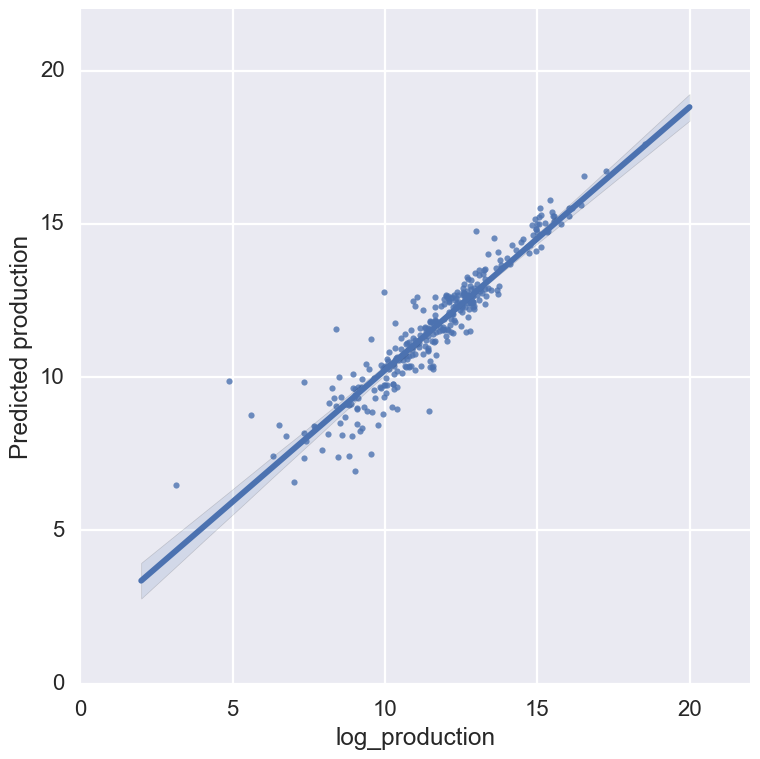

In [25]:
fig = plt.subplots(figsize=(8,8))
sns.regplot(test[target],rf.predict(test[features + dummy_categoricals]))
plt.ylabel("Predicted production")
plt.xlim(0,22)
plt.ylim(0,22)
plt.tight_layout()

In [26]:
#input = true & predicted
#test matrics by importing explained_variance_score, r2_score, mean_squared_error

In [27]:
r2_score(test[target], rf.predict(test[features + dummy_categoricals]))

0.87141503371439788

In [28]:
explained_variance_score(test[target],rf.predict(test[features + dummy_categoricals]))

0.87141541775555298

In [29]:
mean_squared_error(test[target], rf.predict(test[features + dummy_categoricals]))

0.5963676126890729

In [30]:
rf_importances = pd.DataFrame({'name': train[features + dummy_categoricals].columns,
                              'importance': rf.feature_importances_
                              }).sort_values(by='importance', 
                                             ascending=False).reset_index(drop=True
rf_importances.head(20)

SyntaxError: invalid syntax (<ipython-input-30-a5b58a1fc6c1>, line 5)